Побудова зведених таблиць (місяць-країна) для кожної групи

In [59]:
import pandas as pd

def create_percent_fatal_cases_pivot_table(file_path):
    df = pd.read_csv(file_path)
    df.fillna(0, inplace=True)

    df['Date_reported'] = pd.to_datetime(df['Date_reported'])
    df['Month'] = df['Date_reported'].dt.to_period('M')
    df['New_deaths'] = df['New_deaths'].astype(int)

    # Group by month and country, and calculate the sum of 'New_deaths' and 'New_cases' for each combination
    grouped_df = df.groupby(['Month', 'Country']).agg({'New_deaths': 'sum', 'New_cases': 'sum'}).reset_index()
    grouped_df['percent_of_fatal_cases'] = (grouped_df['New_deaths'] / grouped_df['New_cases']) * 100

    # Create a pivot table
    pivot_table = grouped_df.pivot_table(index='Month', columns='Country', values='percent_of_fatal_cases', fill_value=0)

    return pivot_table

result_pivot_table_1 = create_percent_fatal_cases_pivot_table('NorthAsia1.csv')
result_pivot_table_2 = create_percent_fatal_cases_pivot_table('EastAsia1.csv')
result_pivot_table_3 = create_percent_fatal_cases_pivot_table('SouthAsia 1.csv')
result_pivot_table_4 = create_percent_fatal_cases_pivot_table('WestAsia 1.csv')


Функція для малювання графіку

In [64]:
import matplotlib.pyplot as plt

def draw_plot(data, title):
  fig, ax = plt.subplots(figsize=(8, 4))
  for column in data.columns:
      data[column].plot(ax=ax, label=column)

  ax.set_title(f'Відсоток смертності для країн {title} (%)')
  ax.set_xlabel('Місяць')
  ax.set_ylabel('Відсоток смертності')
  ax.legend()
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

**Північна Азія**

Country  Kazakhstan  Russian Federation
Month                                  
2020-03    0.352113            0.522193
2020-04    1.035822            0.930555
2020-05    0.157442            1.214550
2020-06    0.784656            1.916061
2020-07    0.767840            2.356668
2020-08    2.410221            2.150235
2020-09    2.966150            2.005437
2020-10    1.895535            1.579852
2020-11    0.930975            1.783996
2020-12    1.042485            1.952923
2021-01    0.977904            2.299951
2021-02    1.002761            3.270650
2021-03    1.710861            4.243972
2021-04    0.839188            4.322374
2021-05    1.163917            4.297494
2021-06    1.491203            3.124927
2021-07    0.766142            3.049537
2021-08    1.579204            3.670966
2021-09    3.087680            4.137443
2021-10    1.957686            3.169433
2021-11    1.995204            3.238458
2021-12    2.203921            3.829260
2022-01    0.125802            1.971023


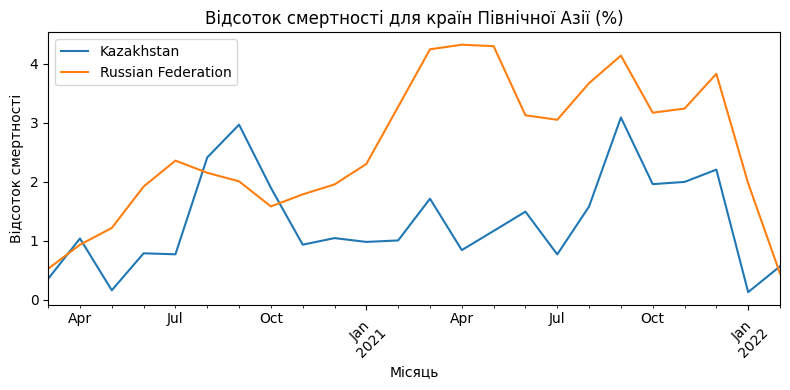

In [68]:
# import matplotlib.pyplot as plt

print(result_pivot_table_1)
draw_plot(result_pivot_table_1, 'Північної Азії')

Побудова графіку

**Східна Азія**

Country     China     Japan  Republic of Korea
Month                                         
2020-03  7.756180  3.267136           1.650604
2020-04  3.054582  2.576377           7.860262
2020-05  2.586207  5.446968           3.783784
2020-06  0.483871  5.198181           0.962310
2020-07  0.667071  0.227438           1.114983
2020-08  1.964692  0.707460           0.450532
2020-09  2.926829  1.947872           1.993865
2020-10  0.000000  1.118297           2.516854
2020-11  0.241692  0.820882           0.832808
2020-12  0.901503  1.523555           1.234087
2021-01  0.989247  1.417488           2.827051
2021-02  2.114165  5.099988           1.588955
2021-03  1.028278  3.267208           0.982902
2021-04  0.636132  0.897719           0.527506
2021-05  1.292091  1.719362           0.696565
2021-06  7.251803  3.319745           0.367599
2021-07  8.409704  0.615887           0.179222
2021-08  1.725377  0.139917           0.345674
2021-09  0.533333  0.639172           0.321471
2021-10  0.88

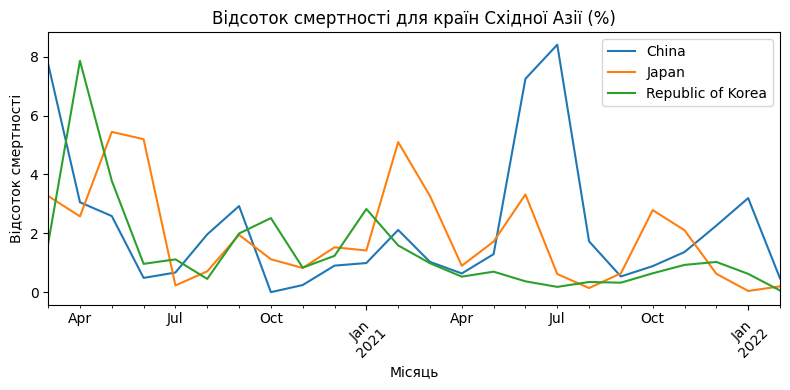

In [69]:
print(result_pivot_table_2)
draw_plot(result_pivot_table_2, 'Східної Азії')

**Південна Азія**

Country  Bangladesh     India     Nepal  Pakistan
Month                                            
2020-03    1.041667  2.572016  0.000000  0.728745
2020-04    2.444134  3.131246  0.000000  2.279309
2020-05    1.209958  2.788361  0.525970  2.094759
2020-06    1.200433  3.152724  0.187500  1.993566
2020-07    1.389116  1.863977  0.325287  2.399869
2020-08    1.510833  1.457206  0.982555  2.116244
2020-09    1.889252  1.265614  0.910057  1.175311
2020-10    1.618474  1.283516  0.767460  1.578767
2020-11    1.267455  1.188529  1.407517  1.860843
2020-12    1.803556  1.374459  1.789871  2.429790
2021-01    2.597053  1.191404  1.893880  2.450768
2021-02    2.536788  0.792188  1.413317  3.411742
2021-03    1.002061  0.514463  0.741840  1.859856
2021-04    1.436421  0.616592  0.588488  2.026507
2021-05    2.859386  1.222364  1.598412  2.916267
2021-06    1.773913  2.984071  2.268957  4.010318
2021-07    1.847018  2.177888  1.501803  1.630129
2021-08    2.049547  1.305920  1.272468  1.747820


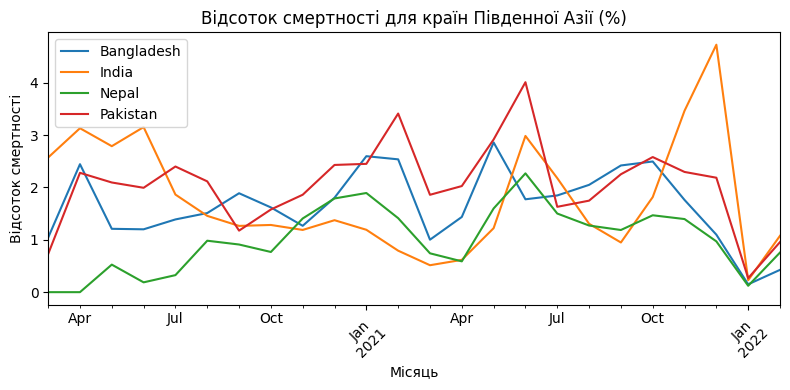

In [70]:
print(result_pivot_table_3)
draw_plot(result_pivot_table_3, 'Південної Азії')

Західна Азія

Country  Azerbaijan   Georgia     Qatar    Turkey  United Arab Emirates
Month                                                                  
2020-03    2.040816  0.000000  0.000000  1.459065              0.439560
2020-04    1.245675  1.291990  0.114051  2.588397              0.738363
2020-05    1.089196  2.348993  0.056640  3.269474              0.793091
2020-06    1.242775  2.127660  0.192703  1.729713              0.363933
2020-07    1.527648  0.483092  0.351265  1.754865              0.285663
2020-08    1.902907  0.887574  0.341479  0.260625              0.334386
2020-09    1.473297  0.237781  0.279373  0.701966              0.150305
2020-10    0.865544  0.746430  0.245298  0.764267              0.193085
2020-11    1.030978  0.990023  0.106496  0.884106              0.219945
2020-12    1.103471  1.285341  0.158156  0.820099              0.250073
2021-01    3.868802  2.194160  0.049499  1.849032              0.183424
2021-02    2.318698  2.625128  0.073692  1.186882              0

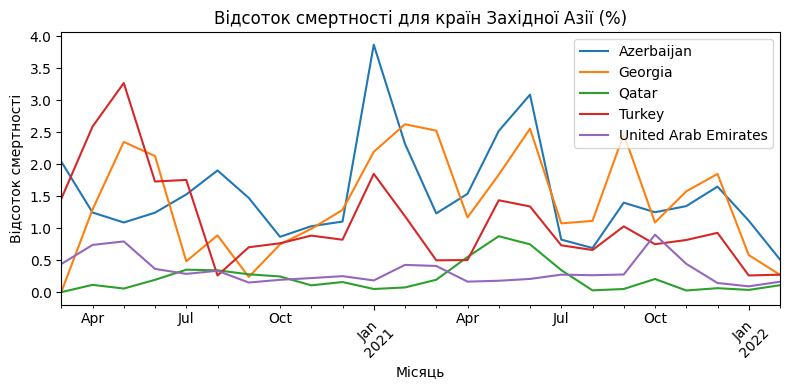

In [72]:
print(result_pivot_table_4)
draw_plot(result_pivot_table_4, 'Західної Азії')

Функція обчислення середнього % смертності для групи країн

In [80]:
# # Calculate the mean of each month
def average_of_group(data):
  monthly_averages = data.mean(axis=1)
  monthly_averages_df = monthly_averages.to_frame(name='Average Percent Fatal Cases')
  monthly_averages_df.reset_index(inplace=True)
  monthly_averages_df['Average Percent Fatal Cases'] = monthly_averages_df['Average Percent Fatal Cases'].round(3)

  return monthly_averages_df

Створення таблиці з 4 груп з середнім % смертності

      Month  North Asia  East Asia  South Asia  West Asia
0   2020-03       0.437      4.225       1.086      0.788
1   2020-04       0.983      4.497       1.964      1.196
2   2020-05       0.686      3.939       1.655      1.511
3   2020-06       1.350      2.215       1.634      1.131
4   2020-07       1.562      0.670       1.495      0.881
5   2020-08       2.280      1.041       1.517      0.745
6   2020-09       2.486      2.290       1.310      0.569
7   2020-10       1.738      1.212       1.312      0.563
8   2020-11       1.357      0.632       1.431      0.646
9   2020-12       1.498      1.220       1.849      0.723
10  2021-01       1.639      1.745       2.033      1.629
11  2021-02       2.137      2.934       2.039      1.326
12  2021-03       2.977      1.759       1.030      0.972
13  2021-04       2.581      0.687       1.167      0.785
14  2021-05       2.731      1.236       2.149      1.369
15  2021-06       2.308      3.646       2.759      1.587
16  2021-07   

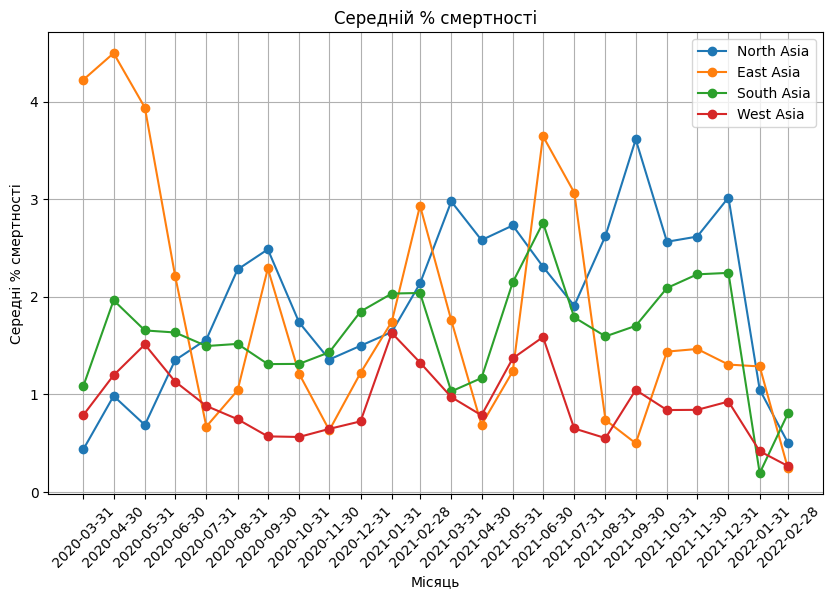

In [109]:
import pandas as pd

north = average_of_group(result_pivot_table_1)
east = average_of_group(result_pivot_table_2)
south = average_of_group(result_pivot_table_3)
west = average_of_group(result_pivot_table_4)

north.rename(columns={'Average Percent Fatal Cases': 'North Asia'}, inplace=True)
east.rename(columns={'Average Percent Fatal Cases': 'East Asia'}, inplace=True)
south.rename(columns={'Average Percent Fatal Cases': 'South Asia'}, inplace=True)
west.rename(columns={'Average Percent Fatal Cases': 'West Asia'}, inplace=True)

combined = pd.merge(north, east, on='Month', how='outer')
combined = pd.merge(combined, south, on='Month', how='outer')
combined = pd.merge(combined, west, on='Month', how='outer')

print(combined)

combined['Month'] = combined['Month'].dt.to_timestamp(freq='M')

plt.figure(figsize=(10, 6))  # Set the figure size
for region in ['North Asia', 'East Asia', 'South Asia', 'West Asia']:
    plt.plot(combined['Month'], combined[region], marker='o', label=region)

plt.title('Середній % смертності')
plt.xlabel('Місяць')
plt.ylabel('Середні % смертності')
plt.xticks(combined['Month'])  # Ensure all months are shown
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Тест Левене

In [114]:
from scipy.stats import levene, kruskal

data_for_test = combined.drop(columns=['Month'])

stat, p = levene(data_for_test['North Asia'], data_for_test['East Asia'],
                  data_for_test['South Asia'], data_for_test['West Asia'])

print(f'Тест Левене: {stat:.4f}')
print(f'p: {p:.4f}')

alpha = 0.05
if p > alpha:
    print("Приймаємо")
else:
    print("Відкидаємо")

Тест Левене: 6.6618
p: 0.0004
Відкидаємо


Краскела

In [118]:
stat, p = kruskal(data_for_test['North Asia'], data_for_test['East Asia'],
                  data_for_test['South Asia'], data_for_test['West Asia'])

print(f'Тест Краскела-Уолліса: {stat:.4f}')
print(f'p-value: {p}')

# Interpreting the result
alpha = 0.05
if p > alpha:
    print("Географічний фактор має незначний вплив на % смертності")
else:
    print("Географічний фактор має значний вплив на % смертності")

Тест Краскела-Уолліса: 22.8680
p-value: 4.302344371432408e-05
Географічний фактор має значний вплив на % смертності
